In [ ]:
from pyspark import SparkContext, SparkConf
import matplotlib.pyplot as plt
from itertools import islice
from datetime import datetime
from operator import add
import pandas as pd
import numpy as np
import json

sc = SparkContext()

In [121]:
using = sc.textFile("Divvy_Trips_2022_full.csv")


def get_infoMonth(line):
    p = line.split(",")
    started_at = p[2][:7]
    return started_at, 1


def get_infoDay(line):
    p = line.split(",")
    started_at = p[2][:10]
    return started_at, 1

In [93]:
months_using = (
    using.map(get_infoMonth)
    .reduceByKey(add)
    .map(lambda x: f"{x[0]},{x[1]}")
    .coalesce(1)
    .saveAsTextFile("months_us")
)
# после обработки я захожу в файл и перемещаю строку started,1 наверх
# чтобы нормально обработать пандасом

In [109]:
months_using = pd.read_csv("months_us/part-00000")

In [110]:
months_using.set_index("started", inplace=True)
months_using = months_using.sort_index(ascending=True)
months_using.head()

,1
started,
2022-01,103770
2022-02,115609
2022-03,284042
2022-04,371249
2022-05,634858


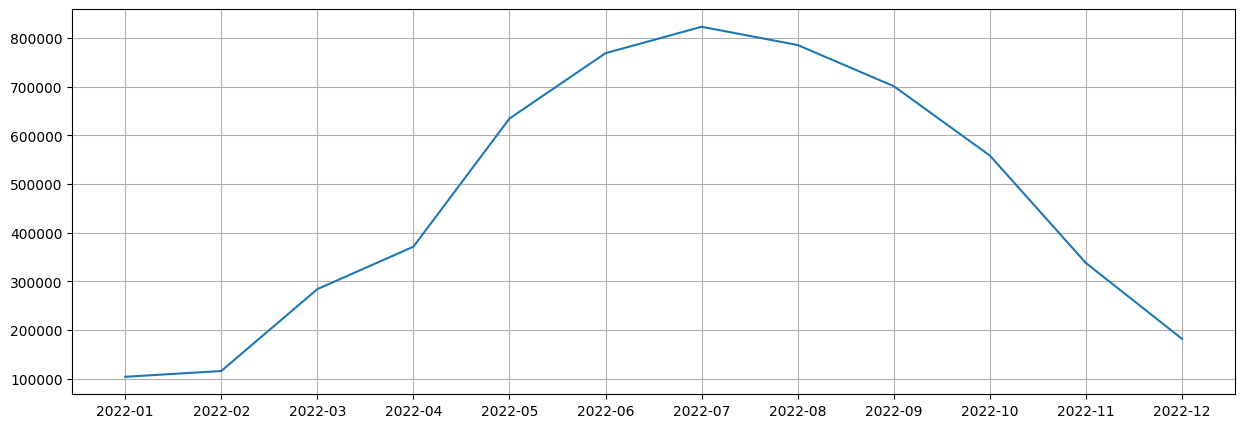

In [113]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(months_using)
# разбивка по месяцам, очевидный рост популярности велотранспорта в теплые сезоны

In [123]:
day_using = (
    using.map(get_infoDay)
    .reduceByKey(add)
    .map(lambda x: f"{x[0]},{x[1]}")
    .coalesce(1)
    .saveAsTextFile("days_us")
)
# после обработки я захожу в файл и перемещаю строку started,1 наверх
# чтобы нормально обработать пандасом

In [134]:
day_using = pd.read_csv("days_us/part-00000")

In [137]:
day_using = day_using.sort_index(ascending=True)
day_using.head()

,1
started_at,
2022-01-01,2563
2022-01-02,2062
2022-01-03,3135
2022-01-04,4377
2022-01-05,2722


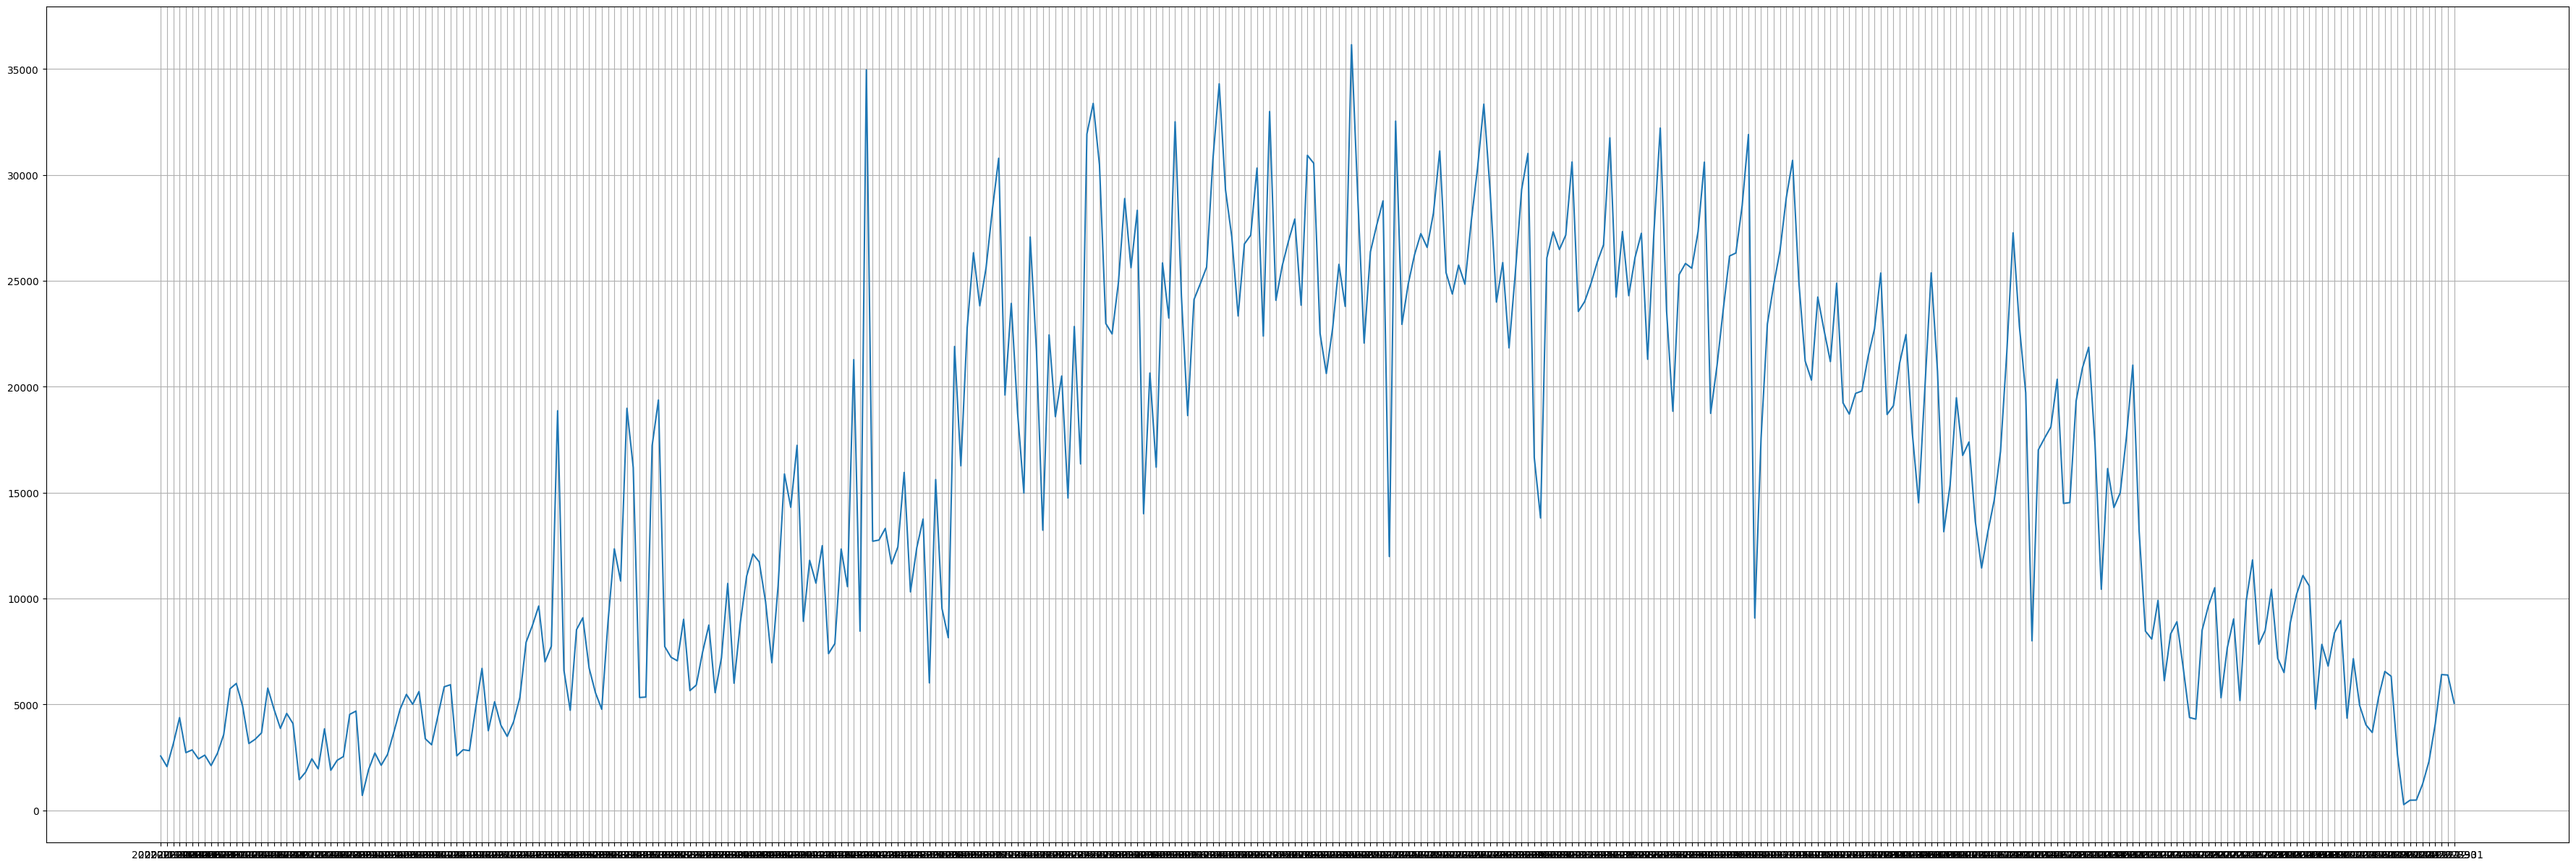

In [148]:
plt.figure(figsize=(45, 15))
plt.grid()
plt.plot(day_using)
# год по дням

In [149]:
january = day_using[day_using.index < "2022-02-01"]
june = day_using[(day_using.index < "2022-07-01") & (day_using.index >= "2022-06-01")]

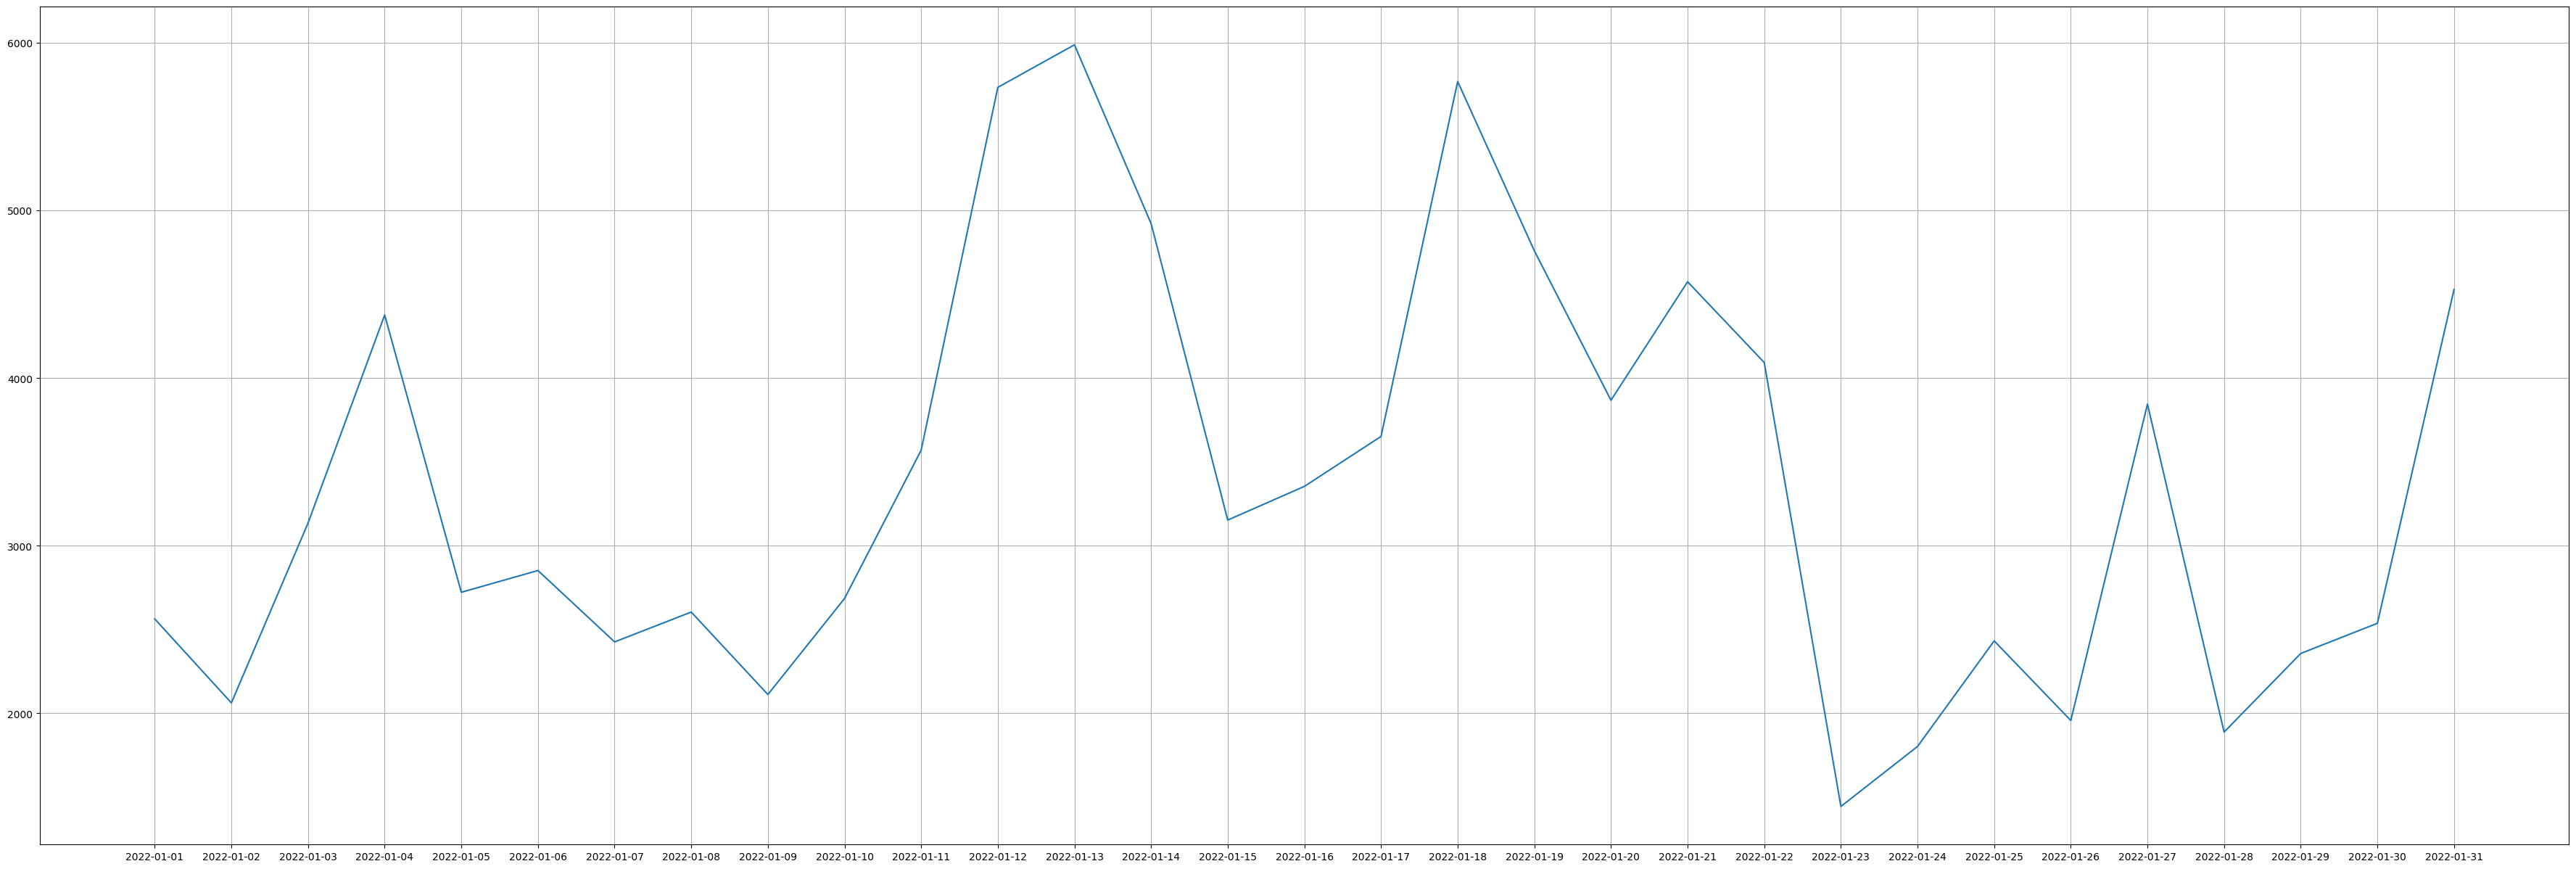

In [150]:
plt.figure(figsize=(45, 15))
plt.grid()
plt.plot(january)
# отдельно рассмотрим январь, провалы в выходные и взлеты в будние дни, видимо, чаще всего велосипеды используют чтобы попасть на работу\учебу

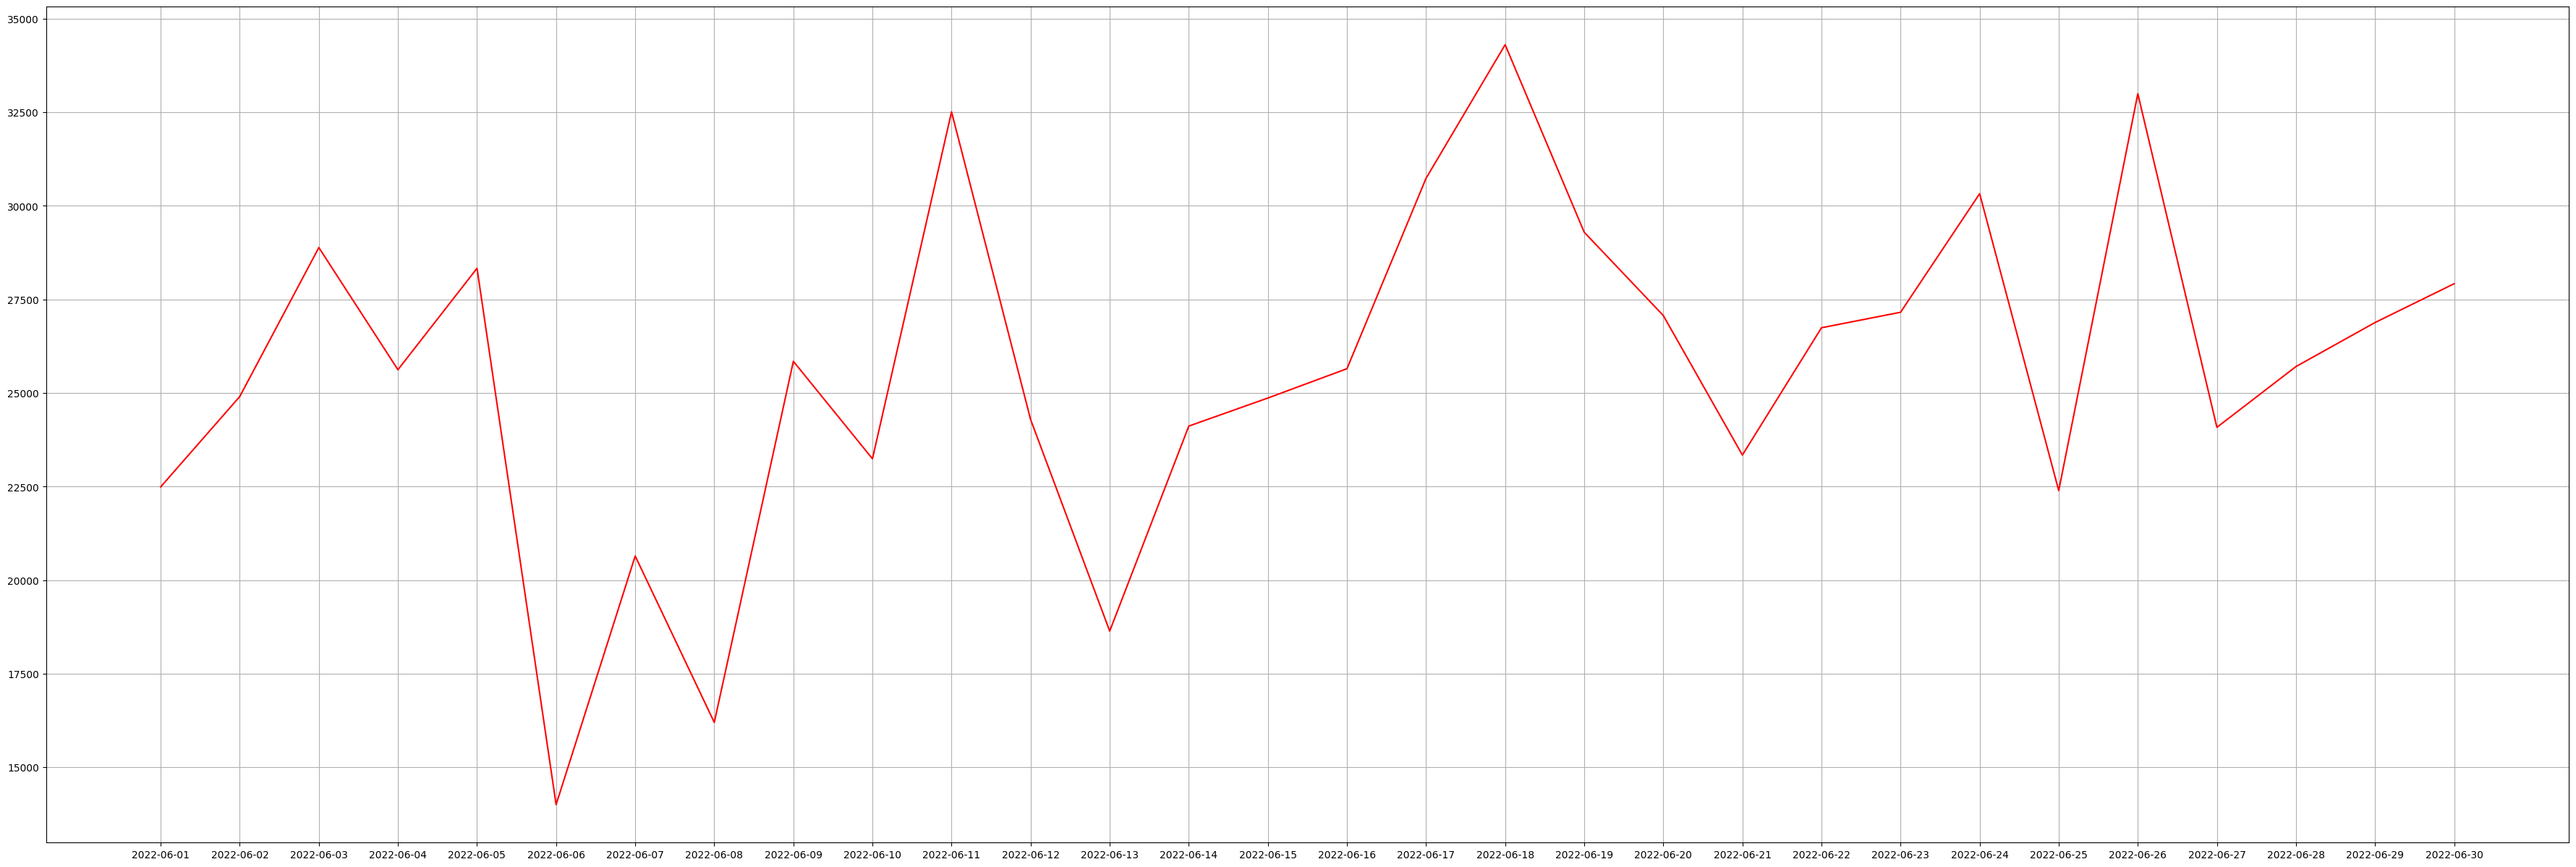

In [151]:
plt.figure(figsize=(45, 15))
plt.grid()
plt.plot(june, color="red")